In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [69]:
#check the data
data = pd.read_csv('train.csv')
data.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,64,65,60,RL,NaN,9375,Pave,NaN,Reg,Lvl,...,0,NaN,GdPrv,NaN,0,2,2009,WD,Normal,219500
1,651,652,70,RL,60.0,9084,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,10,2009,WD,Normal,108000
2,260,261,80,RL,120.0,19296,Pave,NaN,Reg,Lvl,...,0,NaN,GdWo,NaN,0,5,2009,WD,Normal,176000
3,1089,1090,120,FV,37.0,3316,Pave,Pave,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,197000
4,1112,1113,20,RL,73.0,7100,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,129900


In [70]:
data.tail()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1017,962,963,160,RL,24.0,2308,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,155000
1018,135,136,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,174000
1019,17,18,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
1020,668,669,20,RL,NaN,14175,Pave,NaN,Reg,Bnk,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,168000
1021,462,463,20,RL,60.0,8281,Pave,NaN,IR1,Lvl,...,0,NaN,GdWo,NaN,0,12,2009,WD,Normal,62383


In [71]:
#check for missing values 
#we will drop everything that has a high (more than 70%) missing values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1022 non-null   int64  
 1   Id             1022 non-null   int64  
 2   MSSubClass     1022 non-null   int64  
 3   MSZoning       1022 non-null   object 
 4   LotFrontage    842 non-null    float64
 5   LotArea        1022 non-null   int64  
 6   Street         1022 non-null   object 
 7   Alley          60 non-null     object 
 8   LotShape       1022 non-null   object 
 9   LandContour    1022 non-null   object 
 10  Utilities      1022 non-null   object 
 11  LotConfig      1022 non-null   object 
 12  LandSlope      1022 non-null   object 
 13  Neighborhood   1022 non-null   object 
 14  Condition1     1022 non-null   object 
 15  Condition2     1022 non-null   object 
 16  BldgType       1022 non-null   object 
 17  HouseStyle     1022 non-null   object 
 18  OverallQ

In [72]:
numerical_columns = []
non_numerical_columns = []

for column in data.columns:
    if data[column].dtype == 'object':
        non_numerical_columns.append(column)
    else:
        numerical_columns.append(column)

percentage_numerical = (len(numerical_columns) / len(data.columns)) * 100
percentage_non_numerical = (len(non_numerical_columns) / len(data.columns)) * 100

print(f"Percentage of Numerical Columns: {percentage_numerical:.2f}%")
print(f"Percentage of Non-Numerical Columns: {percentage_non_numerical:.2f}%")


Percentage of Numerical Columns: 47.56%
Percentage of Non-Numerical Columns: 52.44%


In [73]:
#inittialy we drop 5 features 
data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'MiscFeature', 'Fence'], axis=1, inplace=True)



In [74]:
data.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,64,65,60,RL,NaN,9375,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2009,WD,Normal,219500
1,651,652,70,RL,60.0,9084,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,10,2009,WD,Normal,108000
2,260,261,80,RL,120.0,19296,Pave,Reg,Lvl,AllPub,...,252,0,0,0,0,5,2009,WD,Normal,176000
3,1089,1090,120,FV,37.0,3316,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,4,2006,WD,Normal,197000
4,1112,1113,20,RL,73.0,7100,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,7,2006,WD,Normal,129900


In [75]:
#we will drop this feature since it has a high zero value
count_zero = data['3SsnPorch'].value_counts().get(0, 0)
print(f"The number of times '3SsnPorch' equals zero is: {count_zero}")
data.drop(['3SsnPorch'], axis=1, inplace=True)



The number of times '3SsnPorch' equals zero is: 1004


In [76]:
#we will also drop this one due to high zero values
count_zero = data['ScreenPorch'].value_counts().get(0, 0)
print(f"The number of times '3SsnPorch' equals zero is: {count_zero}")
data.drop(['ScreenPorch'], axis=1, inplace=True)


The number of times '3SsnPorch' equals zero is: 940


In [77]:
data.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,64,65,60,RL,NaN,9375,Pave,Reg,Lvl,AllPub,...,576,36,0,0,0,2,2009,WD,Normal,219500
1,651,652,70,RL,60.0,9084,Pave,Reg,Lvl,AllPub,...,120,0,0,0,0,10,2009,WD,Normal,108000
2,260,261,80,RL,120.0,19296,Pave,Reg,Lvl,AllPub,...,0,0,252,0,0,5,2009,WD,Normal,176000
3,1089,1090,120,FV,37.0,3316,Pave,IR1,Lvl,AllPub,...,0,84,0,0,0,4,2006,WD,Normal,197000
4,1112,1113,20,RL,73.0,7100,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,7,2006,WD,Normal,129900


In [78]:
#miscval will also be dropped because of zero values
count_zero = data['MiscVal'].value_counts().get(0, 0)
print(f"The number of times '3SsnPorch' equals zero is: {count_zero}")
data.drop(['MiscVal'], axis=1, inplace=True)


The number of times '3SsnPorch' equals zero is: 992


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1022 non-null   int64  
 1   Id             1022 non-null   int64  
 2   MSSubClass     1022 non-null   int64  
 3   MSZoning       1022 non-null   object 
 4   LotFrontage    842 non-null    float64
 5   LotArea        1022 non-null   int64  
 6   Street         1022 non-null   object 
 7   LotShape       1022 non-null   object 
 8   LandContour    1022 non-null   object 
 9   Utilities      1022 non-null   object 
 10  LotConfig      1022 non-null   object 
 11  LandSlope      1022 non-null   object 
 12  Neighborhood   1022 non-null   object 
 13  Condition1     1022 non-null   object 
 14  Condition2     1022 non-null   object 
 15  BldgType       1022 non-null   object 
 16  HouseStyle     1022 non-null   object 
 17  OverallQual    1022 non-null   int64  
 18  OverallC

In [80]:
#Id and unnamed are unnecessary 
data.drop(['Id', 'Unnamed: 0'], axis=1, inplace=True)



In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1022 non-null   int64  
 1   MSZoning       1022 non-null   object 
 2   LotFrontage    842 non-null    float64
 3   LotArea        1022 non-null   int64  
 4   Street         1022 non-null   object 
 5   LotShape       1022 non-null   object 
 6   LandContour    1022 non-null   object 
 7   Utilities      1022 non-null   object 
 8   LotConfig      1022 non-null   object 
 9   LandSlope      1022 non-null   object 
 10  Neighborhood   1022 non-null   object 
 11  Condition1     1022 non-null   object 
 12  Condition2     1022 non-null   object 
 13  BldgType       1022 non-null   object 
 14  HouseStyle     1022 non-null   object 
 15  OverallQual    1022 non-null   int64  
 16  OverallCond    1022 non-null   int64  
 17  YearBuilt      1022 non-null   int64  
 18  YearRemo

In [83]:
#many missing values 
data.drop(['LotFrontage'], axis=1, inplace=True)

In [85]:
data.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MoSold,YrSold,SalePrice
count,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1015.000000,1022.000000,1022.000000,1022.000000,...,968.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,56.149706,10306.330724,6.112524,5.564579,1971.557730,1984.930528,102.175369,443.432485,47.929550,568.239726,...,1978.457645,1.774951,472.549902,93.991194,44.808219,20.854207,2.869863,6.389432,2007.820939,181123.119374
std,41.215899,9635.841640,1.404505,1.110557,29.823413,20.930978,179.987735,461.804349,161.199583,444.253839,...,25.058118,0.735446,209.407113,125.412155,62.973390,60.358181,41.479727,2.728133,1.313022,81038.559207
min,20.000000,1477.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,7500.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,0.000000,218.500000,...,1962.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129125.000000
50%,50.000000,9410.500000,6.000000,5.000000,1972.000000,1994.000000,0.000000,383.500000,0.000000,485.000000,...,1980.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,6.000000,2008.000000,165000.000000
75%,70.000000,11433.250000,7.000000,6.000000,2001.000000,2004.000000,164.500000,701.500000,0.000000,798.000000,...,2003.000000,2.000000,576.000000,168.000000,65.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1127.000000,2336.000000,...,2010.000000,4.000000,1418.000000,736.000000,502.000000,552.000000,738.000000,12.000000,2010.000000,755000.000000


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1022 non-null   int64  
 1   MSZoning       1022 non-null   object 
 2   LotArea        1022 non-null   int64  
 3   Street         1022 non-null   object 
 4   LotShape       1022 non-null   object 
 5   LandContour    1022 non-null   object 
 6   Utilities      1022 non-null   object 
 7   LotConfig      1022 non-null   object 
 8   LandSlope      1022 non-null   object 
 9   Neighborhood   1022 non-null   object 
 10  Condition1     1022 non-null   object 
 11  Condition2     1022 non-null   object 
 12  BldgType       1022 non-null   object 
 13  HouseStyle     1022 non-null   object 
 14  OverallQual    1022 non-null   int64  
 15  OverallCond    1022 non-null   int64  
 16  YearBuilt      1022 non-null   int64  
 17  YearRemodAdd   1022 non-null   int64  
 18  RoofStyl

In [86]:
count = 0

for i in range(len(data['Utilities'])):
    if data['Utilities'][i] == 'AllPub':
        count += 1


if count == len(data['Utilities']) -1 :
    data.drop(['Utilities'], axis=1, inplace=True)

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1022 non-null   int64  
 1   MSZoning       1022 non-null   object 
 2   LotArea        1022 non-null   int64  
 3   Street         1022 non-null   object 
 4   LotShape       1022 non-null   object 
 5   LandContour    1022 non-null   object 
 6   LotConfig      1022 non-null   object 
 7   LandSlope      1022 non-null   object 
 8   Neighborhood   1022 non-null   object 
 9   Condition1     1022 non-null   object 
 10  Condition2     1022 non-null   object 
 11  BldgType       1022 non-null   object 
 12  HouseStyle     1022 non-null   object 
 13  OverallQual    1022 non-null   int64  
 14  OverallCond    1022 non-null   int64  
 15  YearBuilt      1022 non-null   int64  
 16  YearRemodAdd   1022 non-null   int64  
 17  RoofStyle      1022 non-null   object 
 18  RoofMatl

In [88]:
data.drop(['MSSubClass'], axis=1, inplace=True)

In [89]:
# we will dropp all these features because they have missing values and we have more garage features that can be relevant

data = data.drop(columns=['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'])


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1022 non-null   object 
 1   LotArea        1022 non-null   int64  
 2   Street         1022 non-null   object 
 3   LotShape       1022 non-null   object 
 4   LandContour    1022 non-null   object 
 5   LotConfig      1022 non-null   object 
 6   LandSlope      1022 non-null   object 
 7   Neighborhood   1022 non-null   object 
 8   Condition1     1022 non-null   object 
 9   Condition2     1022 non-null   object 
 10  BldgType       1022 non-null   object 
 11  HouseStyle     1022 non-null   object 
 12  OverallQual    1022 non-null   int64  
 13  OverallCond    1022 non-null   int64  
 14  YearBuilt      1022 non-null   int64  
 15  YearRemodAdd   1022 non-null   int64  
 16  RoofStyle      1022 non-null   object 
 17  RoofMatl       1022 non-null   object 
 18  Exterior

In [91]:
data.var()

C:\Users\eduar\AppData\Local\Temp\ipykernel_19652\445316826.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.var()


LotArea          9.284944e+07
OverallQual      1.972634e+00
OverallCond      1.233338e+00
YearBuilt        8.894359e+02
YearRemodAdd     4.381058e+02
MasVnrArea       3.239558e+04
BsmtFinSF1       2.132633e+05
BsmtFinSF2       2.598531e+04
BsmtUnfSF        1.973615e+05
TotalBsmtSF      2.091486e+05
1stFlrSF         1.581727e+05
2ndFlrSF         1.836364e+05
LowQualFinSF     2.149215e+03
GrLivArea        2.668043e+05
BsmtFullBath     2.689202e-01
BsmtHalfBath     5.836820e-02
FullBath         2.967439e-01
HalfBath         2.504586e-01
BedroomAbvGr     6.406414e-01
KitchenAbvGr     4.140448e-02
TotRmsAbvGrd     2.520544e+00
Fireplaces       4.134238e-01
GarageCars       5.408803e-01
GarageArea       4.385134e+04
WoodDeckSF       1.572821e+04
OpenPorchSF      3.965648e+03
EnclosedPorch    3.643110e+03
PoolArea         1.720568e+03
MoSold           7.442709e+00
YrSold           1.724027e+00
SalePrice        6.567248e+09
dtype: float64

In [95]:
#we can drop some features that have low variance and seem to be not too relevant

#these have relatively low variances compared to the rest

data.drop(['BsmtFullBath','BsmtHalfBath',], axis=1, inplace=True)

KeyError: "['BsmtFullBath', 'BsmtHalfBath'] not found in axis"

In [93]:
#Poolarea will also be dropped because of zero values
count_zero = data['PoolArea'].value_counts().get(0, 0)
print(f"The number of times 'Pool Area' equals zero is: {count_zero}")
data.drop(['PoolArea',], axis=1, inplace=True)

The number of times 'Pool Area' equals zero is: 1017


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1022 non-null   object 
 1   LotArea        1022 non-null   int64  
 2   Street         1022 non-null   object 
 3   LotShape       1022 non-null   object 
 4   LandContour    1022 non-null   object 
 5   LotConfig      1022 non-null   object 
 6   LandSlope      1022 non-null   object 
 7   Neighborhood   1022 non-null   object 
 8   Condition1     1022 non-null   object 
 9   Condition2     1022 non-null   object 
 10  BldgType       1022 non-null   object 
 11  HouseStyle     1022 non-null   object 
 12  OverallQual    1022 non-null   int64  
 13  OverallCond    1022 non-null   int64  
 14  YearBuilt      1022 non-null   int64  
 15  YearRemodAdd   1022 non-null   int64  
 16  RoofStyle      1022 non-null   object 
 17  RoofMatl       1022 non-null   object 
 18  Exterior

In [96]:
#low variance and insignificant
data.drop(['LowQualFinSF'], axis=1, inplace=True)


In [97]:
data.head(30)

,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,RL,9375,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,645,Y,576,36,0,2,2009,WD,Normal,219500
1,RL,9084,Pave,Reg,Lvl,Inside,Gtl,Edwards,Artery,Norm,...,296,P,120,0,0,10,2009,WD,Normal,108000
2,RL,19296,Pave,Reg,Lvl,Corner,Gtl,NAmes,Artery,Norm,...,884,Y,0,0,252,5,2009,WD,Normal,176000
3,FV,3316,Pave,IR1,Lvl,Inside,Gtl,Somerst,Norm,Norm,...,550,Y,0,84,0,4,2006,WD,Normal,197000
4,RL,7100,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,...,308,Y,0,0,0,7,2006,WD,Normal,129900
5,RL,13758,Pave,IR1,Lvl,CulDSac,Gtl,Timber,Norm,Norm,...,400,Y,168,36,0,4,2007,WD,Normal,187500
6,RL,9937,Pave,Reg,Lvl,Corner,Gtl,Edwards,Norm,Norm,...,480,Y,0,0,0,3,2009,WD,Normal,167000
7,RL,11250,Pave,IR1,Lvl,Inside,Gtl,Veenker,Norm,Norm,...,546,Y,198,42,0,6,2006,WD,Normal,165000
8,RL,6762,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,662,Y,168,55,0,7,2006,New,Partial,193879
9,RM,10440,Pave,Reg,Lvl,Inside,Gtl,OldTown,Norm,Norm,...,686,P,70,78,68,6,2008,WD,Normal,157500


In [98]:
#repetitive and irrelevant
data.drop(['Condition2'], axis=1, inplace=True)


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1022 non-null   object 
 1   LotArea        1022 non-null   int64  
 2   Street         1022 non-null   object 
 3   LotShape       1022 non-null   object 
 4   LandContour    1022 non-null   object 
 5   LotConfig      1022 non-null   object 
 6   LandSlope      1022 non-null   object 
 7   Neighborhood   1022 non-null   object 
 8   Condition1     1022 non-null   object 
 9   BldgType       1022 non-null   object 
 10  HouseStyle     1022 non-null   object 
 11  OverallQual    1022 non-null   int64  
 12  OverallCond    1022 non-null   int64  
 13  YearBuilt      1022 non-null   int64  
 14  YearRemodAdd   1022 non-null   int64  
 15  RoofStyle      1022 non-null   object 
 16  RoofMatl       1022 non-null   object 
 17  Exterior1st    1022 non-null   object 
 18  Exterior

In [100]:
selected_columns = data[['Exterior2nd', 'Exterior1st']]
selected_columns.head(50)

,Exterior2nd,Exterior1st
0,VinylSd,VinylSd
1,MetalSd,MetalSd
2,Wd Sdng,Wd Sdng
3,MetalSd,MetalSd
4,Wd Shng,WdShing
5,HdBoard,HdBoard
6,MetalSd,MetalSd
7,Plywood,Plywood
8,VinylSd,VinylSd
9,MetalSd,MetalSd


In [101]:
# Check how often values in 'Exterior2nd' differ from 'Exterior1st'
differences = (data['Exterior2nd'] != data['Exterior1st']).sum()
total_rows = data.shape[0]

# Calculate the percentage of differences
percentage_difference = (differences / total_rows) * 100

print(f"The percentage of differences between 'Exterior2nd' and 'Exterior1st' is: {percentage_difference:.2f}%")


The percentage of differences between 'Exterior2nd' and 'Exterior1st' is: 14.77%


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1022 non-null   object 
 1   LotArea        1022 non-null   int64  
 2   Street         1022 non-null   object 
 3   LotShape       1022 non-null   object 
 4   LandContour    1022 non-null   object 
 5   LotConfig      1022 non-null   object 
 6   LandSlope      1022 non-null   object 
 7   Neighborhood   1022 non-null   object 
 8   Condition1     1022 non-null   object 
 9   BldgType       1022 non-null   object 
 10  HouseStyle     1022 non-null   object 
 11  OverallQual    1022 non-null   int64  
 12  OverallCond    1022 non-null   int64  
 13  YearBuilt      1022 non-null   int64  
 14  YearRemodAdd   1022 non-null   int64  
 15  RoofStyle      1022 non-null   object 
 16  RoofMatl       1022 non-null   object 
 17  Exterior1st    1022 non-null   object 
 18  Exterior

In [103]:
#we will drop quality since we already have condition and also basement exposure 
data.drop(['BsmtQual'], axis=1, inplace=True)


In [104]:
data.drop(['BsmtExposure'], axis=1, inplace=True)


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1022 non-null   object 
 1   LotArea        1022 non-null   int64  
 2   Street         1022 non-null   object 
 3   LotShape       1022 non-null   object 
 4   LandContour    1022 non-null   object 
 5   LotConfig      1022 non-null   object 
 6   LandSlope      1022 non-null   object 
 7   Neighborhood   1022 non-null   object 
 8   Condition1     1022 non-null   object 
 9   BldgType       1022 non-null   object 
 10  HouseStyle     1022 non-null   object 
 11  OverallQual    1022 non-null   int64  
 12  OverallCond    1022 non-null   int64  
 13  YearBuilt      1022 non-null   int64  
 14  YearRemodAdd   1022 non-null   int64  
 15  RoofStyle      1022 non-null   object 
 16  RoofMatl       1022 non-null   object 
 17  Exterior1st    1022 non-null   object 
 18  Exterior

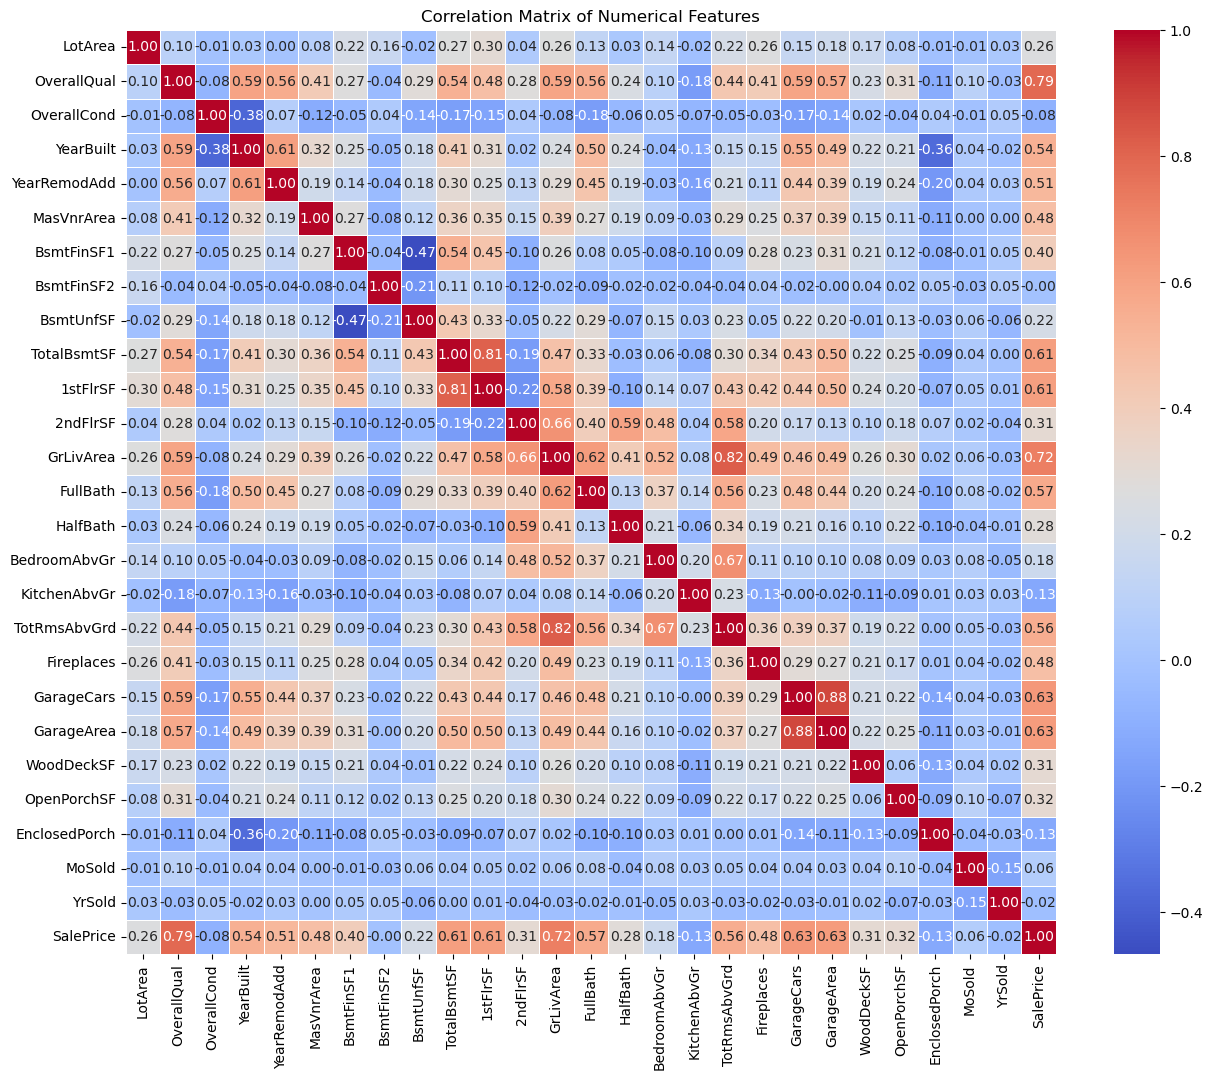

In [106]:
#visualize correlations to drop more features that are higly correlated

import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Create a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [107]:
#garage cars and garage area are very similar, we will drop garage cars 
data.drop(['GarageCars'], axis=1, inplace=True)

#totRmabvgrd and Grlivarea are also related, we will leave grlivarea sine it's more general
data.drop(['TotRmsAbvGrd'], axis=1, inplace=True)

#drop 2stflrSF due to correlation with the total 
data.drop(['1stFlrSF'], axis=1, inplace=True)


In [108]:
#we started with 82 columns, we have 54. meaning out of the 79 features, we have dropped 28. We still need to get from 51 to 35. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1022 non-null   object 
 1   LotArea        1022 non-null   int64  
 2   Street         1022 non-null   object 
 3   LotShape       1022 non-null   object 
 4   LandContour    1022 non-null   object 
 5   LotConfig      1022 non-null   object 
 6   LandSlope      1022 non-null   object 
 7   Neighborhood   1022 non-null   object 
 8   Condition1     1022 non-null   object 
 9   BldgType       1022 non-null   object 
 10  HouseStyle     1022 non-null   object 
 11  OverallQual    1022 non-null   int64  
 12  OverallCond    1022 non-null   int64  
 13  YearBuilt      1022 non-null   int64  
 14  YearRemodAdd   1022 non-null   int64  
 15  RoofStyle      1022 non-null   object 
 16  RoofMatl       1022 non-null   object 
 17  Exterior1st    1022 non-null   object 
 18  Exterior

C:\Users\eduar\AppData\Local\Temp\ipykernel_19652\478382300.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = numerical_features.corr()


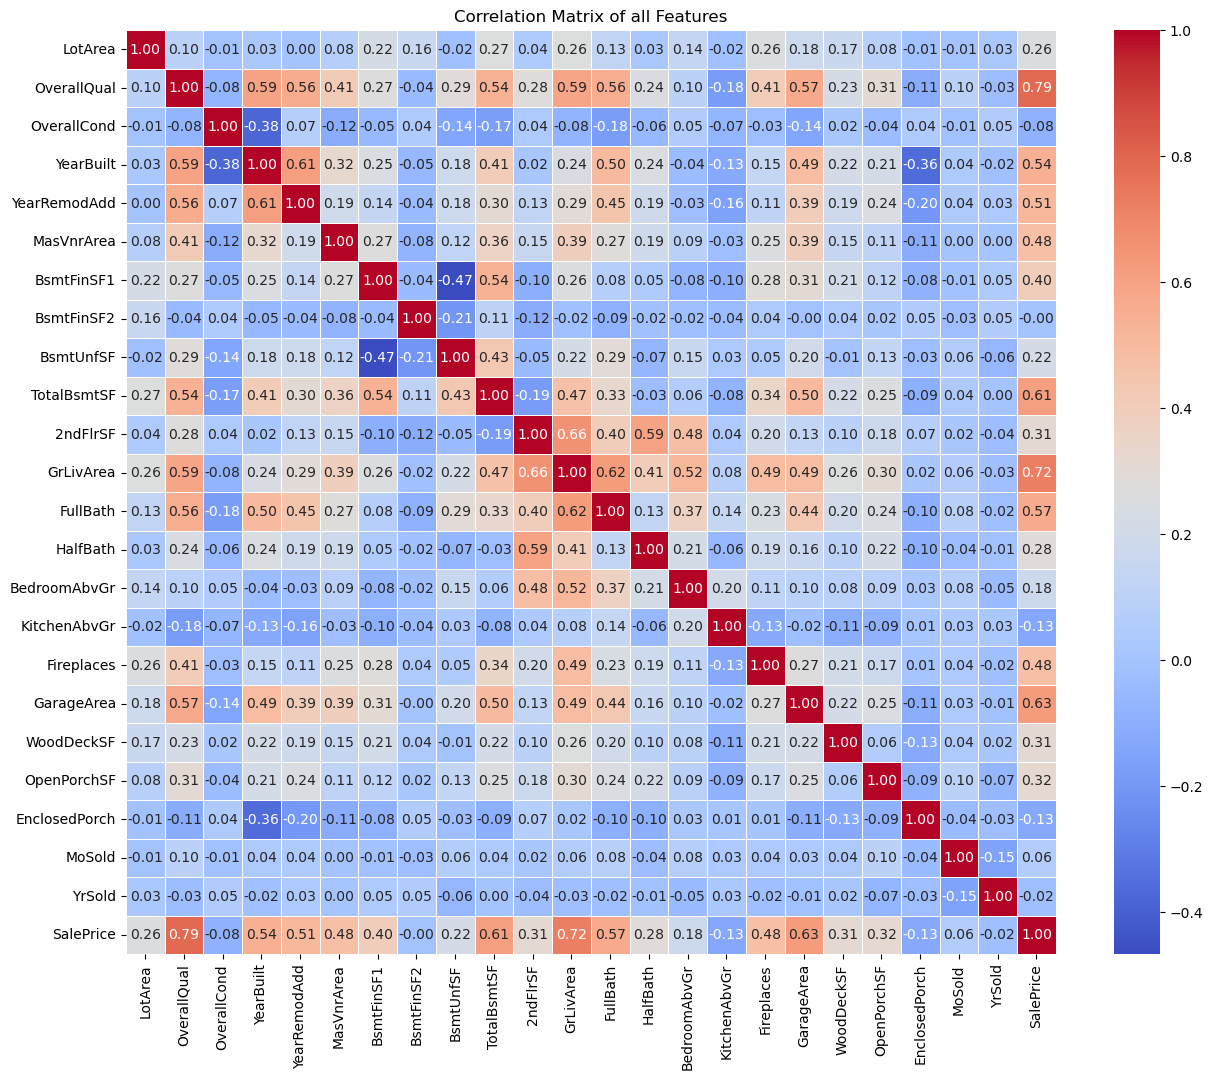

In [109]:
#visualize correlations to drop more features that are higly correlated

import seaborn as sns

# Select numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64', 'object'])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Create a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix of all Features")
plt.show()

In [110]:
#we will drop unfinished since we have finished for floor one and floor 2, and we will also drop halfbath.
data.drop(['HalfBath', 'BsmtUnfSF'], axis=1, inplace=True)


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1022 non-null   object 
 1   LotArea        1022 non-null   int64  
 2   Street         1022 non-null   object 
 3   LotShape       1022 non-null   object 
 4   LandContour    1022 non-null   object 
 5   LotConfig      1022 non-null   object 
 6   LandSlope      1022 non-null   object 
 7   Neighborhood   1022 non-null   object 
 8   Condition1     1022 non-null   object 
 9   BldgType       1022 non-null   object 
 10  HouseStyle     1022 non-null   object 
 11  OverallQual    1022 non-null   int64  
 12  OverallCond    1022 non-null   int64  
 13  YearBuilt      1022 non-null   int64  
 14  YearRemodAdd   1022 non-null   int64  
 15  RoofStyle      1022 non-null   object 
 16  RoofMatl       1022 non-null   object 
 17  Exterior1st    1022 non-null   object 
 18  Exterior

In [112]:
#we already have yearbuilt
data.drop(['YearRemodAdd',], axis=1, inplace=True)


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1022 non-null   object 
 1   LotArea        1022 non-null   int64  
 2   Street         1022 non-null   object 
 3   LotShape       1022 non-null   object 
 4   LandContour    1022 non-null   object 
 5   LotConfig      1022 non-null   object 
 6   LandSlope      1022 non-null   object 
 7   Neighborhood   1022 non-null   object 
 8   Condition1     1022 non-null   object 
 9   BldgType       1022 non-null   object 
 10  HouseStyle     1022 non-null   object 
 11  OverallQual    1022 non-null   int64  
 12  OverallCond    1022 non-null   int64  
 13  YearBuilt      1022 non-null   int64  
 14  RoofStyle      1022 non-null   object 
 15  RoofMatl       1022 non-null   object 
 16  Exterior1st    1022 non-null   object 
 17  Exterior2nd    1022 non-null   object 
 18  MasVnrTy

In [114]:
#get rid of all that have missing values

for column in data.columns:
    if data[column].isnull().any():
        print(f"Dropping column: {column}")
        data = data.drop(columns=[column])


data.head()


Dropping column: MasVnrType
Dropping column: MasVnrArea
Dropping column: BsmtCond
Dropping column: BsmtFinType1
Dropping column: BsmtFinType2


,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,RL,9375,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,645,Y,576,36,0,2,2009,WD,Normal,219500
1,RL,9084,Pave,Reg,Lvl,Inside,Gtl,Edwards,Artery,1Fam,...,296,P,120,0,0,10,2009,WD,Normal,108000
2,RL,19296,Pave,Reg,Lvl,Corner,Gtl,NAmes,Artery,1Fam,...,884,Y,0,0,252,5,2009,WD,Normal,176000
3,FV,3316,Pave,IR1,Lvl,Inside,Gtl,Somerst,Norm,TwnhsE,...,550,Y,0,84,0,4,2006,WD,Normal,197000
4,RL,7100,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,1Fam,...,308,Y,0,0,0,7,2006,WD,Normal,129900


In [115]:
threshold_percentage = 75

features_with_many_zeroes = []

for column in data.columns:
    # Check the percentage of zeroes in each column
    zeroes_percentage = (data[column] == 0).sum() / len(data) * 100
    
    # If the percentage exceeds the threshold, add the column to the list
    if zeroes_percentage >= threshold_percentage:
        features_with_many_zeroes.append(column)


data.drop(columns=features_with_many_zeroes, axis=1, inplace=True)


In [116]:
data.describe()

,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
count,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,10306.330724,6.112524,5.564579,1971.557730,443.432485,1059.601761,337.803327,1510.353229,1.566536,2.863992,1.041096,0.614481,472.549902,93.991194,44.808219,6.389432,2007.820939,181123.119374
std,9635.841640,1.404505,1.110557,29.823413,461.804349,457.327726,428.528123,516.531047,0.544742,0.800401,0.203481,0.642980,209.407113,125.412155,62.973390,2.728133,1.313022,81038.559207
min,1477.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,7500.000000,5.000000,5.000000,1953.000000,0.000000,785.000000,0.000000,1134.250000,1.000000,2.000000,1.000000,0.000000,336.000000,0.000000,0.000000,5.000000,2007.000000,129125.000000
50%,9410.500000,6.000000,5.000000,1972.000000,383.500000,991.000000,0.000000,1471.000000,2.000000,3.000000,1.000000,1.000000,480.000000,0.000000,24.000000,6.000000,2008.000000,165000.000000
75%,11433.250000,7.000000,6.000000,2001.000000,701.500000,1311.500000,723.750000,1775.750000,2.000000,3.000000,1.000000,1.000000,576.000000,168.000000,65.000000,8.000000,2009.000000,213500.000000
max,215245.000000,10.000000,9.000000,2010.000000,5644.000000,6110.000000,2065.000000,5642.000000,3.000000,6.000000,2.000000,3.000000,1418.000000,736.000000,502.000000,12.000000,2010.000000,755000.000000


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1022 non-null   object
 1   LotArea        1022 non-null   int64 
 2   Street         1022 non-null   object
 3   LotShape       1022 non-null   object
 4   LandContour    1022 non-null   object
 5   LotConfig      1022 non-null   object
 6   LandSlope      1022 non-null   object
 7   Neighborhood   1022 non-null   object
 8   Condition1     1022 non-null   object
 9   BldgType       1022 non-null   object
 10  HouseStyle     1022 non-null   object
 11  OverallQual    1022 non-null   int64 
 12  OverallCond    1022 non-null   int64 
 13  YearBuilt      1022 non-null   int64 
 14  RoofStyle      1022 non-null   object
 15  RoofMatl       1022 non-null   object
 16  Exterior1st    1022 non-null   object
 17  Exterior2nd    1022 non-null   object
 18  ExterQual      1022 non-null

In [118]:
for column in data.select_dtypes(include='number').columns:
    if data[column].var() < 0.1: 
        data = data.drop(columns=[column])


In [119]:
column_to_check = 'RoofMatl'

percentage_same_roof = (data[column_to_check].value_counts().max() / len(data)) * 100

print(f"The percentage of houses with the same '{column_to_check}' is: {percentage_same_roof:.2f}%")


The percentage of houses with the same 'RoofMatl' is: 98.14%


In [120]:
data.drop(['RoofMatl',], axis=1, inplace=True)


In [121]:
column_to_check = 'Functional'

percentage_same_roof = (data[column_to_check].value_counts().max() / len(data)) * 100

print(f"The percentage of the same '{column_to_check}' is: {percentage_same_roof:.2f}%")


The percentage of the same 'Functional' is: 92.47%


In [122]:
data.drop(['Functional',], axis=1, inplace=True)


In [123]:
column_to_check = 'Street'

percentage_same_roof = (data[column_to_check].value_counts().max() / len(data)) * 100

print(f"The percentage of the same '{column_to_check}' is: {percentage_same_roof:.2f}%")


The percentage of the same 'Street' is: 99.51%


In [124]:
data.drop(['Street',], axis=1, inplace=True)


In [125]:
column_to_check = 'ExterCond'

percentage_same_roof = (data[column_to_check].value_counts().max() / len(data)) * 100

print(f"The percentage of houses with the same '{column_to_check}' is: {percentage_same_roof:.2f}%")


The percentage of houses with the same 'ExterCond' is: 88.16%


In [126]:
data.drop(['ExterCond',], axis=1, inplace=True)


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1022 non-null   object
 1   LotArea        1022 non-null   int64 
 2   LotShape       1022 non-null   object
 3   LandContour    1022 non-null   object
 4   LotConfig      1022 non-null   object
 5   LandSlope      1022 non-null   object
 6   Neighborhood   1022 non-null   object
 7   Condition1     1022 non-null   object
 8   BldgType       1022 non-null   object
 9   HouseStyle     1022 non-null   object
 10  OverallQual    1022 non-null   int64 
 11  OverallCond    1022 non-null   int64 
 12  YearBuilt      1022 non-null   int64 
 13  RoofStyle      1022 non-null   object
 14  Exterior1st    1022 non-null   object
 15  Exterior2nd    1022 non-null   object
 16  ExterQual      1022 non-null   object
 17  Foundation     1022 non-null   object
 18  BsmtFinSF1     1022 non-null

In [128]:
categorical_columns = data.select_dtypes(include='object').columns
high_cardinality_categorical = [col for col in categorical_columns if data[col].nunique() > 10]
print(high_cardinality_categorical)

['Neighborhood', 'Exterior1st', 'Exterior2nd']


In [129]:
data.drop(['Exterior1st', 'Exterior2nd'], axis=1, inplace=True)


In [130]:
#we have now 35 featurs and our target
data.head()

,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,...,Fireplaces,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,RL,9375,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,...,0,645,Y,576,36,2,2009,WD,Normal,219500
1,RL,9084,Reg,Lvl,Inside,Gtl,Edwards,Artery,1Fam,2Story,...,1,296,P,120,0,10,2009,WD,Normal,108000
2,RL,19296,Reg,Lvl,Corner,Gtl,NAmes,Artery,1Fam,SLvl,...,1,884,Y,0,0,5,2009,WD,Normal,176000
3,FV,3316,IR1,Lvl,Inside,Gtl,Somerst,Norm,TwnhsE,1Story,...,1,550,Y,0,84,4,2006,WD,Normal,197000
4,RL,7100,IR1,Lvl,Corner,Gtl,NAmes,Norm,1Fam,1Story,...,0,308,Y,0,0,7,2006,WD,Normal,129900


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1022 non-null   object
 1   LotArea        1022 non-null   int64 
 2   LotShape       1022 non-null   object
 3   LandContour    1022 non-null   object
 4   LotConfig      1022 non-null   object
 5   LandSlope      1022 non-null   object
 6   Neighborhood   1022 non-null   object
 7   Condition1     1022 non-null   object
 8   BldgType       1022 non-null   object
 9   HouseStyle     1022 non-null   object
 10  OverallQual    1022 non-null   int64 
 11  OverallCond    1022 non-null   int64 
 12  YearBuilt      1022 non-null   int64 
 13  RoofStyle      1022 non-null   object
 14  ExterQual      1022 non-null   object
 15  Foundation     1022 non-null   object
 16  BsmtFinSF1     1022 non-null   int64 
 17  TotalBsmtSF    1022 non-null   int64 
 18  Heating        1022 non-null

In [132]:
 #convert all non numerical to numerical 

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in data.columns:
    if data[column].dtype == 'object':
        # Use LabelEncoder to convert
        data[column] = label_encoder.fit_transform(data[column])



In [133]:
data.head()

,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,...,Fireplaces,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,3,9375,3,3,4,0,4,2,0,5,...,0,645,2,576,36,2,2009,8,4,219500
1,3,9084,3,3,4,0,6,0,0,5,...,1,296,1,120,0,10,2009,8,4,108000
2,3,19296,3,3,0,0,11,0,0,7,...,1,884,2,0,0,5,2009,8,4,176000
3,1,3316,0,3,4,0,20,2,4,2,...,1,550,2,0,84,4,2006,8,4,197000
4,3,7100,0,3,0,0,11,2,0,2,...,0,308,2,0,0,7,2006,8,4,129900


In [141]:
from sklearn.preprocessing import StandardScaler

X = data.iloc[:, :-1]  # All columns except the last one
y = data['SalePrice']  # Last column (SalePrice)

scaler = StandardScaler()

# Standardize the numerical columns (excluding the last column)
X_standardized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

df_standardized = pd.concat([X_standardized, y], axis=1)

df_standardized

,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,...,Fireplaces,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-0.029329,-0.096700,0.750788,0.310082,0.617480,-0.237226,-1.202006,-0.027539,-0.402711,1.035470,...,-0.956145,0.823919,0.273665,3.845280,-0.139941,-1.609739,0.898414,0.309238,0.206309,219500
1,-0.029329,-0.126915,0.750788,0.310082,0.617480,-0.237226,-0.873059,-2.279097,-0.402711,1.035470,...,0.599874,-0.843507,-1.861343,0.207488,-0.711890,1.324105,0.898414,0.309238,0.206309,108000
2,-0.029329,0.933398,0.750788,0.310082,-1.809692,-0.237226,-0.050694,-2.279097,-0.402711,2.071447,...,0.599874,1.965795,0.273665,-0.749825,-0.711890,-0.509547,0.898414,0.309238,0.206309,176000
3,-3.184488,-0.725806,-1.380615,0.310082,0.617480,-0.237226,1.429564,-0.027539,2.977745,-0.518495,...,0.599874,0.370035,0.273665,-0.749825,0.622659,-0.876278,-1.387510,0.309238,0.206309,197000
4,-0.029329,-0.332913,-1.380615,0.310082,-1.809692,-0.237226,-0.050694,-0.027539,-0.402711,-0.518495,...,-0.956145,-0.786174,0.273665,-0.749825,-0.711890,0.223914,-1.387510,0.309238,0.206309,129900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,-0.029329,-0.830467,0.750788,0.310082,-1.809692,-0.237226,0.113779,-0.027539,2.977745,1.035470,...,0.599874,-0.155514,0.273665,-0.366900,-0.711890,0.223914,-0.625535,0.309238,0.206309,155000
1018,-0.029329,0.009726,0.750788,0.310082,0.617480,-0.237226,0.278253,-0.027539,-0.402711,-0.518495,...,0.599874,0.274481,0.273665,0.031981,-0.711890,-0.509547,0.136440,0.309238,0.206309,174000
1019,-0.029329,0.050323,0.750788,0.310082,0.617480,-0.237226,1.100618,-0.027539,1.287517,-0.518495,...,-0.956145,0.207593,0.273665,-0.749825,-0.711890,1.324105,-1.387510,0.309238,0.206309,90000
1020,-0.029329,0.401684,0.750788,-4.031070,-1.809692,3.436182,1.100618,-0.027539,-0.402711,-0.518495,...,0.599874,0.494256,0.273665,1.675369,-0.711890,1.690836,-1.387510,0.309238,0.206309,168000


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSZoning       1022 non-null   int32
 1   LotArea        1022 non-null   int64
 2   LotShape       1022 non-null   int32
 3   LandContour    1022 non-null   int32
 4   LotConfig      1022 non-null   int32
 5   LandSlope      1022 non-null   int32
 6   Neighborhood   1022 non-null   int32
 7   Condition1     1022 non-null   int32
 8   BldgType       1022 non-null   int32
 9   HouseStyle     1022 non-null   int32
 10  OverallQual    1022 non-null   int64
 11  OverallCond    1022 non-null   int64
 12  YearBuilt      1022 non-null   int64
 13  RoofStyle      1022 non-null   int32
 14  ExterQual      1022 non-null   int32
 15  Foundation     1022 non-null   int32
 16  BsmtFinSF1     1022 non-null   int64
 17  TotalBsmtSF    1022 non-null   int64
 18  Heating        1022 non-null   int32
 19  Heatin

In [146]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [148]:
df = pd.DataFrame(data)

# Now you can proceed with extracting features (X) and target variable (y)
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']